In [82]:
import math
import itertools
from operator import itemgetter

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm.sklearn import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import VotingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

from sklearn.base import BaseEstimator
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing  import OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer

seed = -3241747941808157888 & 0xffffffff #hash of my username

pd.set_option('display.max_columns', 100)

In [3]:
conda install lightgbm

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /Users/aishwaryagabhane/opt/anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38hecd8cb5_0        14.5 MB
    lightgbm-3.1.1             |   py38h23ab428_0         867 KB
    ------------------------------------------------------------
                                           Total:        15.3 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/osx-64::lightgbm-3.1.1-py38h23ab428_0

The following packages will be UPDATED:

  conda                               4.10.1-py38hecd8cb5_1 --> 4.12.0-py38hecd8cb5_0



lig

In [36]:
pip install lightgbm

     |████████████████████████████████| 1.3 MB 955 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [32]:
#reading the traing dataset
df = pd.read_csv("/Users/aishwaryagabhane/aish_univ/Aishwarya/Masters_courses/BAN_693_Capstone/Kaggle_competition_2/train.csv")
df


,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,42095,3,0,0,4,0,0,1,160,2018,12,30,1,0,0,0,140.00,2,1
42096,42096,2,0,0,3,0,0,0,34,2017,9,23,0,0,0,0,224.67,0,0
42097,42097,2,0,0,2,2,0,0,292,2018,7,21,0,0,0,0,96.00,0,0
42098,42098,1,0,0,3,0,0,0,5,2018,11,9,0,0,0,0,120.00,0,0


In [33]:
#reading the test dataset
testdf = pd.read_csv("/Users/aishwaryagabhane/aish_univ/Aishwarya/Masters_courses/BAN_693_Capstone/Kaggle_competition_2/test.csv")
testdf

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28063,70163,2,0,1,2,0,0,0,315,2018,9,30,1,0,0,0,160.00,0
28064,70164,2,0,2,2,0,0,0,81,2018,3,25,0,0,0,0,65.00,1
28065,70165,2,0,1,2,0,0,0,40,2018,10,22,0,0,0,0,85.00,0
28066,70166,3,0,0,4,0,0,1,4,2018,9,6,1,0,0,0,162.75,0


In [34]:
unknown_features = [f"V{i}" for i in range(1, 29)]

x_cols = [col for col in df.columns if col not in {'booking_status'}]
y_col = 'booking_status'

x_cols_ord = [col for col in x_cols if df[col].nunique() < 30]
x_cols_num = [col for col in x_cols if col not in x_cols_ord]

df.sample(5)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2370,2370,1,0,0,1,0,0,0,32,2018,7,18,0,0,0,0,85.00,0,0
13919,13919,2,0,1,1,0,0,1,68,2018,3,25,1,0,0,0,131.40,0,1
11017,11017,3,0,0,1,0,0,1,15,2018,2,26,1,0,0,0,130.00,0,0
16211,16211,2,0,1,3,0,0,1,91,2018,4,1,1,0,0,0,92.65,0,0
5442,5442,2,0,2,2,0,0,1,82,2018,4,17,1,0,0,0,107.10,1,1


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [36]:
#sanity check for dulpicates
df[df.duplicated(x_cols, keep=False)].sort_values(x_cols)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


# Exploratory Analysis

In [37]:
df[x_cols].describe(percentiles=[.01, .05, .25, .50, .75, .95, .99])

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,420.990000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,2104.950000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2017.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000
95%,39994.050000,3.000000,1.000000,2.000000,5.000000,2.000000,0.000000,2.000000,261.050000,2018.000000,12.000000,30.000000,1.000000,0.000000,0.000000,0.000000,169.000000,2.000000


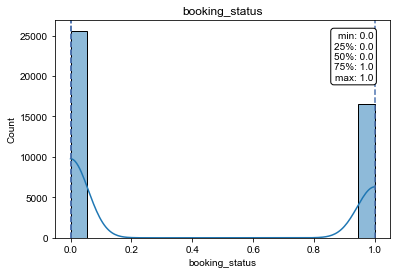

In [92]:

x = 'booking_status'
fig, ax = plt.subplots()
ax.title.set_text('booking_status')
variable = df[x].fillna(df[x].mean())
sns.histplot(variable, kde=True)
des = df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.show()

# Box plot

<AxesSubplot:>

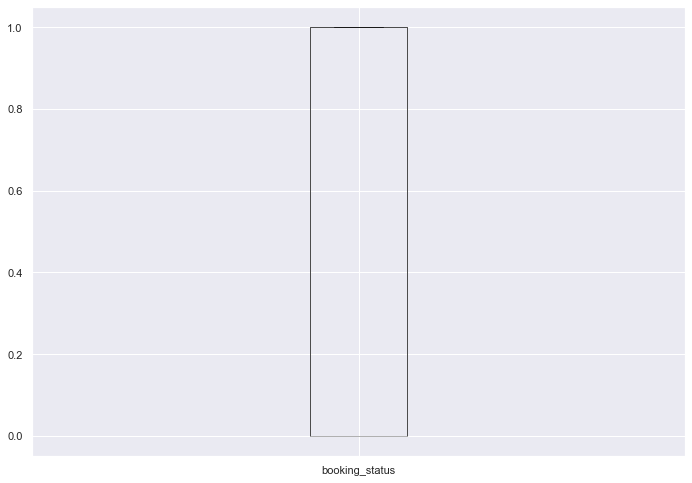

In [93]:
df.boxplot(column=['booking_status'])

<AxesSubplot:>

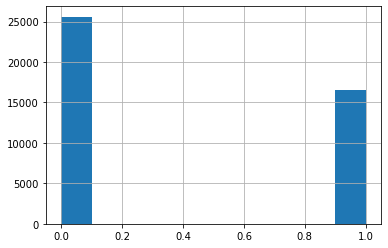

In [71]:
df.booking_status.hist()

<AxesSubplot:>

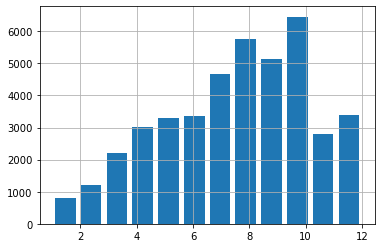

In [74]:
df.arrival_month.hist(bins=12, rwidth=0.8)

<AxesSubplot:>

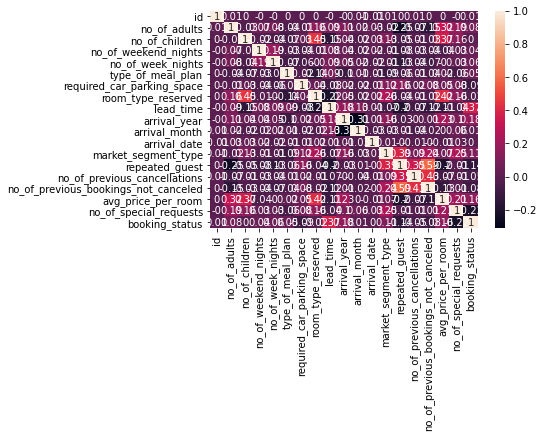

In [72]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

# Relationship between leadtime and booking_status

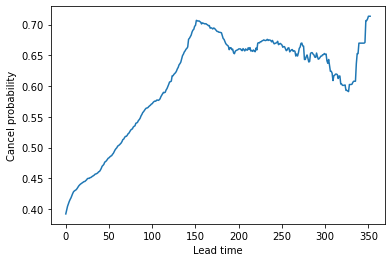

In [73]:
leadtime = list(range(0, 353))
count = [df[(df['lead_time'] >= i)].booking_status.value_counts().loc[1] / df[(df['lead_time'] >= i)].shape[0] for i in leadtime]

plt.xlabel('Lead time')
plt.ylabel('Cancel probability')
plt.plot(leadtime, count)

# Relationship between arrival_month and booking_status

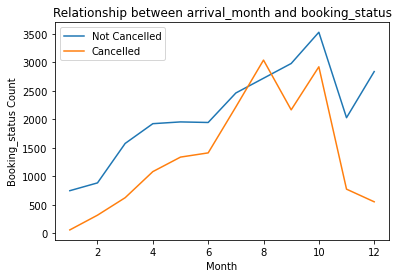

In [75]:
plt.title("Relationship between arrival_month and booking_status")
plt.plot(df.groupby(df.arrival_month)['booking_status'].value_counts().loc[:, 0], label='Not Cancelled')
plt.plot(df.groupby(df.arrival_month)['booking_status'].value_counts().loc[:, 1], label='Cancelled')

plt.legend()
plt.xlabel('Month')
plt.ylabel('Booking_status Count')

plt.show()

# Relationship between arrival_year and booking_status

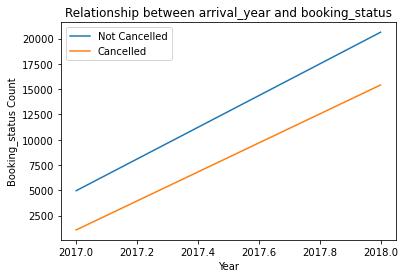

In [77]:
plt.title("Relationship between arrival_year and booking_status")
plt.plot(df.groupby(df.arrival_year)['booking_status'].value_counts().loc[:, 0], label='Not Cancelled')
plt.plot(df.groupby(df.arrival_year)['booking_status'].value_counts().loc[:, 1], label='Cancelled')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Booking_status Count')

plt.show()

# Relationship between arrival_month and booking_status cancellations splitting on years

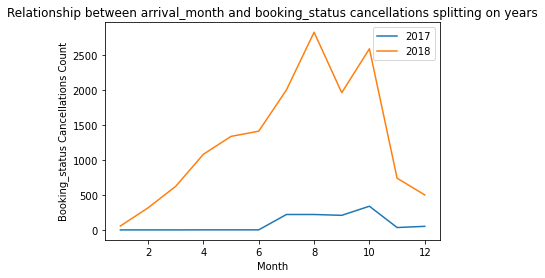

In [79]:
plt.title("Relationship between arrival_month and booking_status cancellations splitting on years")

df_2017 = df[df['arrival_year'] == 2017]
df_2018 = df[df['arrival_year'] == 2018]

plt.plot(df_2017.groupby(df_2017.arrival_month)['booking_status'].value_counts().loc[:, 1], label='2017')
plt.plot(df_2018.groupby(df_2018.arrival_month)['booking_status'].value_counts().loc[:, 1], label='2018')

plt.legend()
plt.xlabel('Month')
plt.ylabel('Booking_status Cancellations Count')

plt.show()

# Relationship between arrival_month and avg_price_per_room

Text(0.5, 0, 'Month')

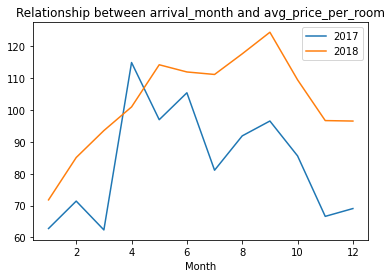

In [80]:
df_2017 = df[df.arrival_year == 2017]
df_2018 = df[df.arrival_year == 2018]

plt.title("Relationship between arrival_month and avg_price_per_room")
plt.plot(df_2017.groupby('arrival_month')['avg_price_per_room'].mean(), label='2017')
plt.plot(df_2018.groupby('arrival_month')['avg_price_per_room'].mean(), label='2018')

plt.legend()
plt.xlabel('Month')

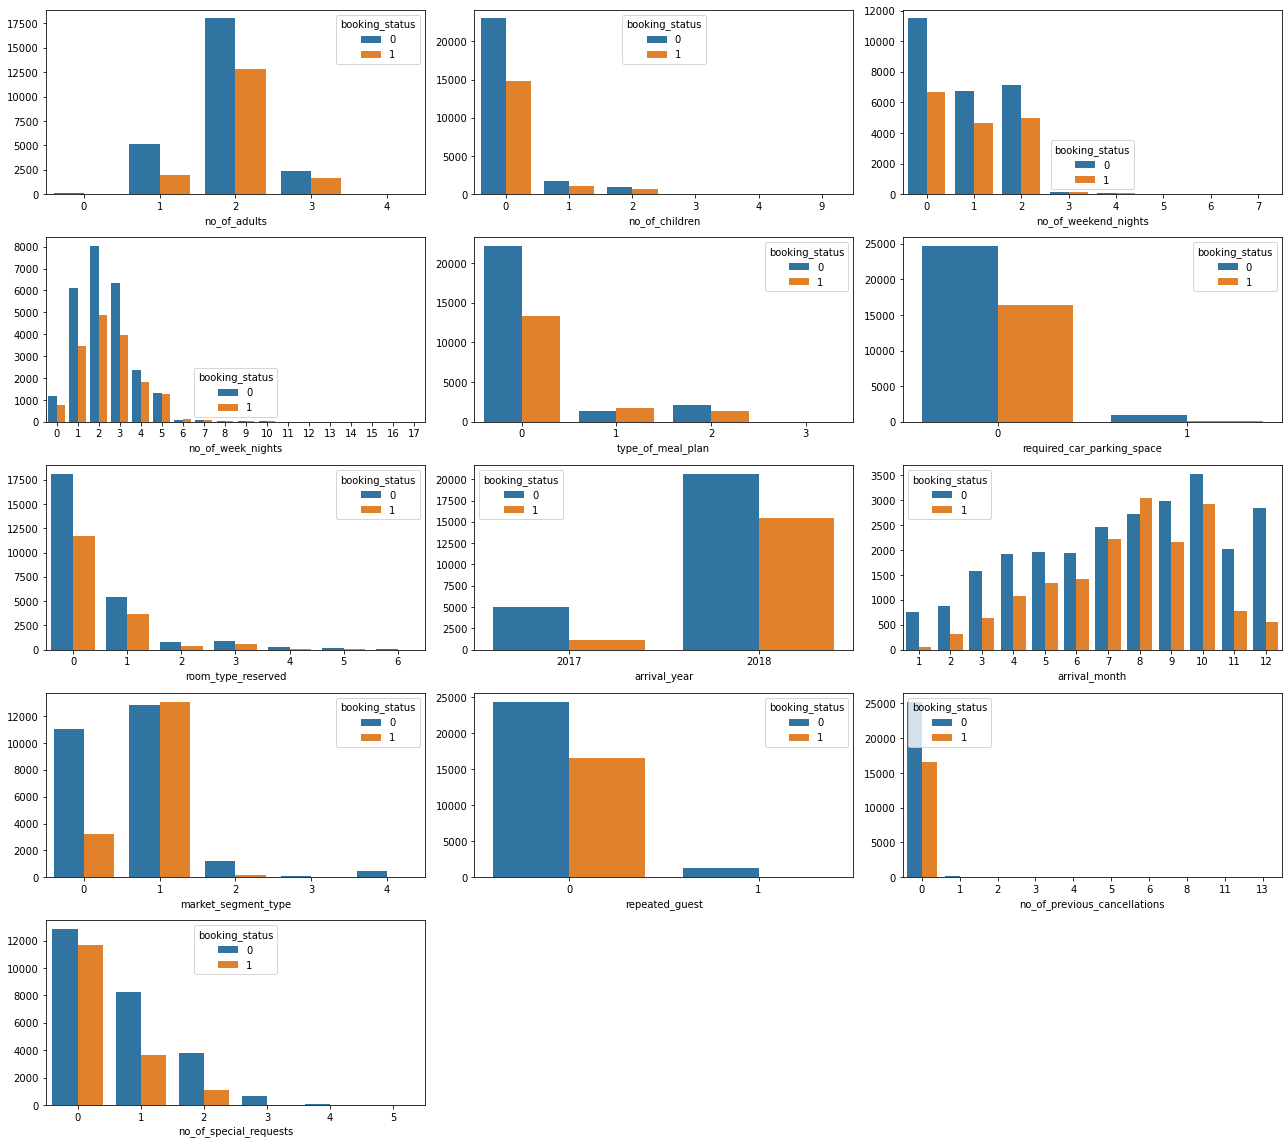

In [38]:
rows, cols = math.ceil(len(x_cols_ord) / 3), 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 16))

for col, ax in zip(x_cols_ord, axes.flatten()):
    sns.countplot(x=df[col],
                  hue=df[y_col],
                  ax=ax)

    ax.set_ylabel('')

for ax in axes.flatten():
    if not ax.get_xlabel():
        ax.set_visible(False)

plt.tight_layout()

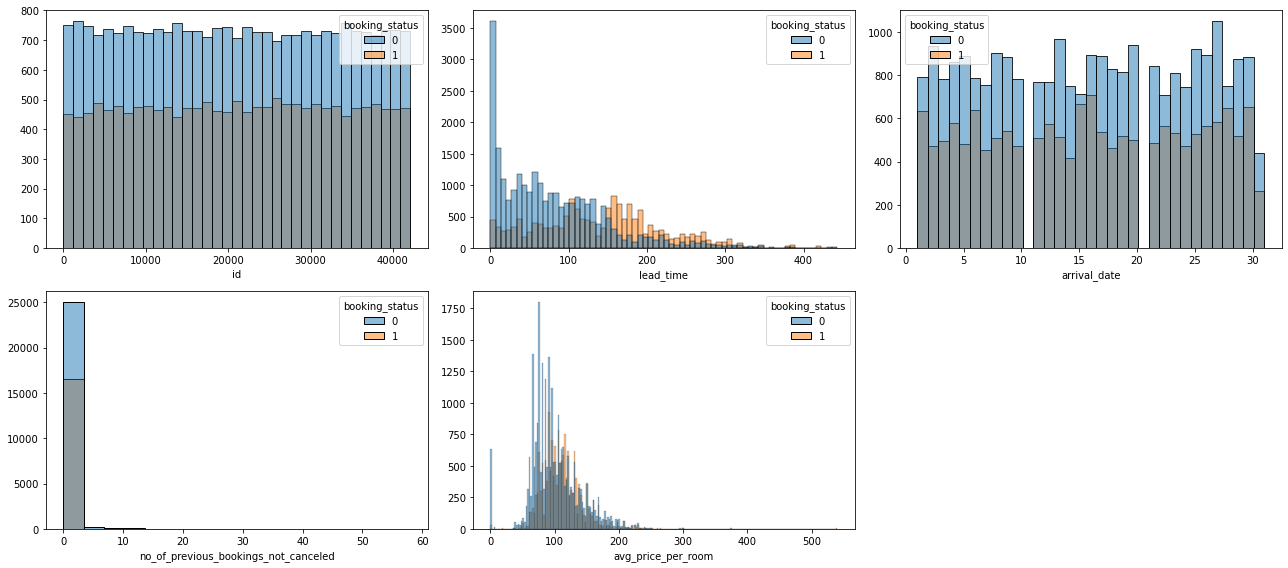

In [39]:
rows, cols = math.ceil(len(x_cols_num) / 3), 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 8))

for col, ax in zip(x_cols_num, axes.flatten()):
    sns.histplot(x=df[col],
                 hue=df[y_col],
                 ax=ax)

    ax.set_ylabel('')

for ax in axes.flatten():
    if not ax.get_xlabel():
        ax.set_visible(False)

plt.tight_layout()

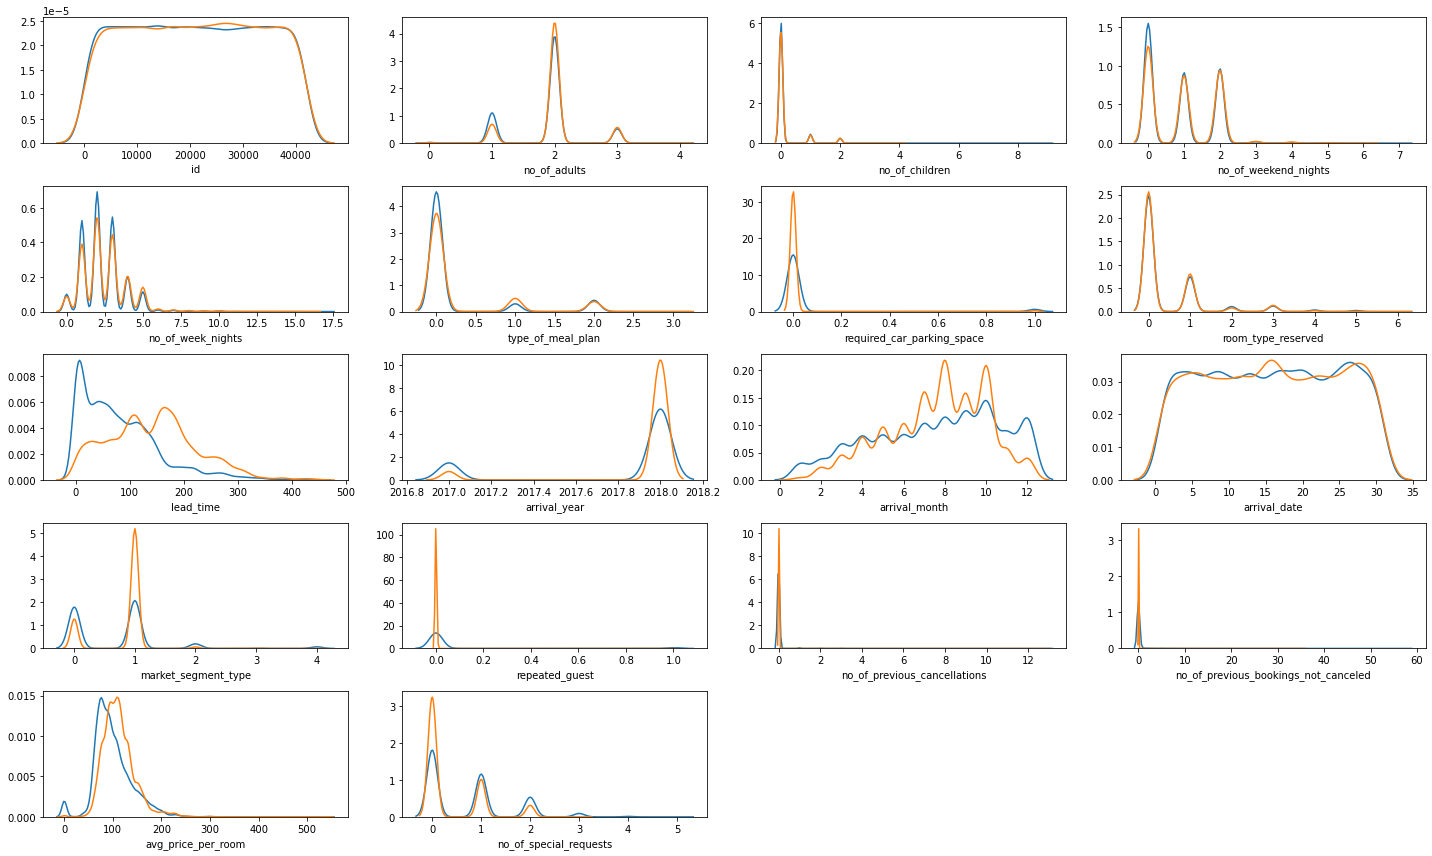

In [40]:
rows, cols = math.ceil(len(x_cols) / 4), 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))

for col, ax in zip(x_cols, axes.flatten()):
    sns.kdeplot(x=df[df[y_col] == 0][col],
                ax=ax)

    sns.kdeplot(x=df[df[y_col] == 1][col],
                ax=ax)

    ax.set_ylabel('')

for ax in axes.flatten():
    if not ax.get_xlabel():
        ax.set_visible(False)

plt.tight_layout()

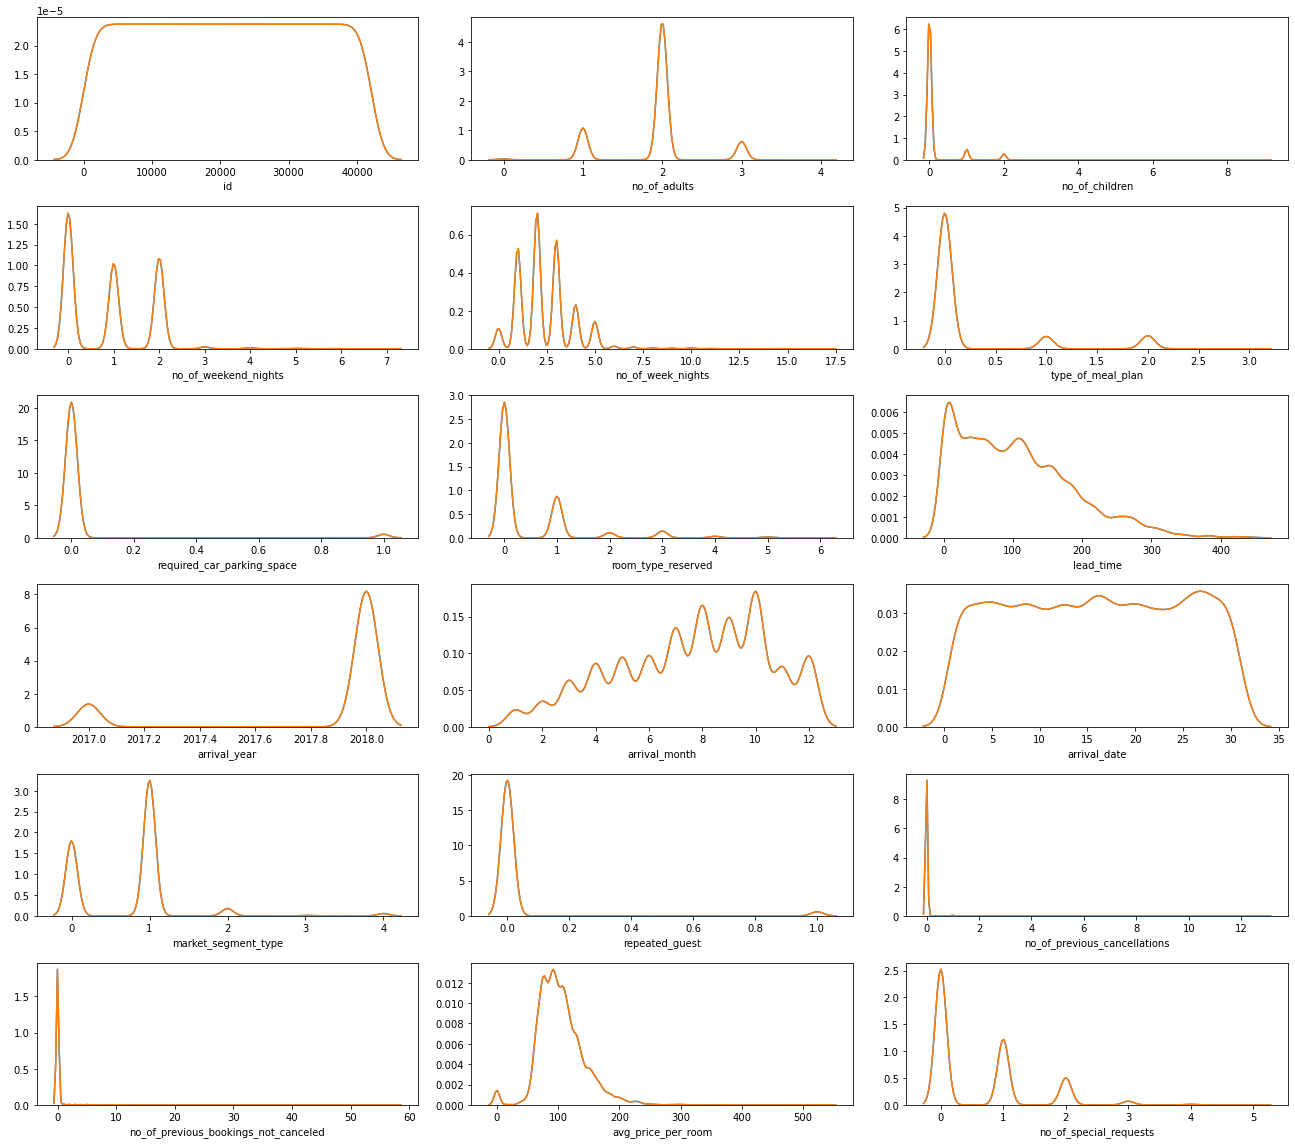

In [41]:
rows, cols = math.ceil(len(x_cols) / 3), 3
fig, axes = plt.subplots(rows, cols, figsize=(18, 16))

for col, ax in zip(x_cols, axes.flatten()):
    sns.kdeplot(x=df[col],
                ax=ax)

    sns.kdeplot(x=df[col],
                ax=ax)

    ax.set_ylabel('')

for ax in axes.flatten():
    if not ax.get_xlabel():
        ax.set_visible(False)

plt.tight_layout()

# Correlation between booking_status and arrival_month

Text(0.5, 1.0, 'Correlation between booking_status and arrival_month')

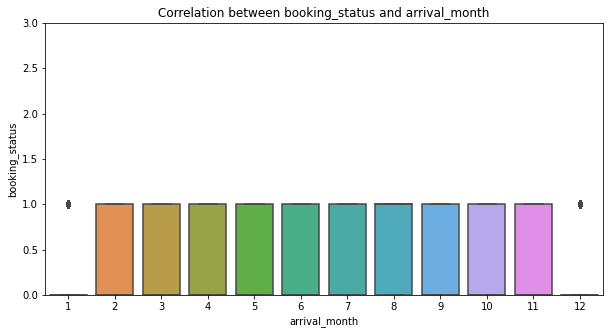

In [90]:
import matplotlib.pyplot as plot
plot.figure(figsize=(10,5))
sns.boxplot(x="arrival_month", y="booking_status", data=df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3)
plot.ylabel("booking_status")
plot.xlabel("arrival_month")
plot.title("Correlation between booking_status and arrival_month")

# Models evaluating using a cross-validation on the ROC-AUC metric.

In [42]:
class RocCurve:
    def __init__(self):
        self.score = []
        self.y = []
        self.y_pred = []
        

    def add_prediction(self, y, y_pred):
        self.score.append(roc_auc_score(y, y_pred))
        self.y.append(y)
        self.y_pred.append(y_pred)


    def plot_roc(self):
        RocCurveDisplay.from_predictions(y_true=np.hstack(self.y),
                                         y_pred=np.hstack(self.y_pred))
        plt.xlabel('FP Rate')
        plt.ylabel('TP Rate')

    def get_roc_auc(self):
        return np.mean(self.score)


    def __str__(self):
        return f"ROC AUC: {self.get_roc_auc():.4f}"

In [43]:
def roc_stratified_kfold(model, X, y, verbose=True):
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    roc_curve = RocCurve()

    for idx_train, idx_val in folds.split(X, y):
        # Split the DataFrame into `train` and `val`
        X_train, y_train = X.iloc[idx_train], y.iloc[idx_train]
        X_val, y_val = X.iloc[idx_val], y.iloc[idx_val]

        # Fit the model
        model.fit(X_train, y_train)

        # Save the result to the RocCurve object
        roc_curve.add_prediction(y_val, model.predict_proba(X_val)[:, 1])

    # Plot the result
    if verbose:
        print(roc_curve)
        roc_curve.plot_roc()
    
    return roc_curve.get_roc_auc()

In [44]:
def roc_search_cv(model, X, y, param_distributions, n_iter=50):
    search_cv = RandomizedSearchCV(estimator=model,
                                   scoring='roc_auc',
                                   n_iter=n_iter,
                                   cv=5,
                                   n_jobs=-1,
                                   param_distributions=param_distributions,
                                   random_state=seed)

    search_cv.fit(X, y)

    # Update the model params to the best combination found
    model.set_params(**search_cv.best_params_)

    # Prints the best parameters found
    print(search_cv.best_params_)

    # Run CV and plot the ROC curve.
    roc_stratified_kfold(model=model, X=X, y=y)
    
    return model

In [45]:
def feature_engineering(df):
    df['avg_price_per_adult'] = df.avg_price_per_room / df.no_of_adults.clip(lower=1)
    df['is_promo'] = df.avg_price_per_room < 20
    df['old_reservation'] = df.lead_time > 150

    return df


column_transformer = ColumnTransformer([
    ('feature_engineering', FunctionTransformer(feature_engineering, validate=False), x_cols)
])


def make_classifier_pipeline(model):
    return Pipeline([
#         ('column_transformer', column_transformer),
        ('standard_scaler', MinMaxScaler()),
        ('model', model)
    ])

In [46]:
models = {}

# Logistic Regression

ROC AUC: 0.8333
CPU times: user 4.41 s, sys: 686 ms, total: 5.1 s
Wall time: 688 ms


0.8332946704560765

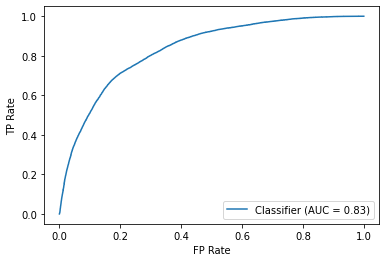

In [53]:
%%time

models['logistic_regression'] = make_classifier_pipeline(
    LogisticRegression(random_state=seed)
)

roc_stratified_kfold(model=models['logistic_regression'],
                     X=df[x_cols],
                     y=df[y_col])
                    

In [25]:
pip install --upgrade scikit-learn

     |████████████████████████████████| 9.0 MB 6.6 MB/s eta 0:00:01     |██████▉                         | 1.9 MB 2.5 MB/s eta 0:00:03
     |████████████████████████████████| 297 kB 7.5 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1
Note: you may need to restart the kernel to use updated packages.


# Random Forest Classifier

ROC AUC: 0.8897
CPU times: user 2min 7s, sys: 873 ms, total: 2min 8s
Wall time: 2min 8s


0.889715685931051

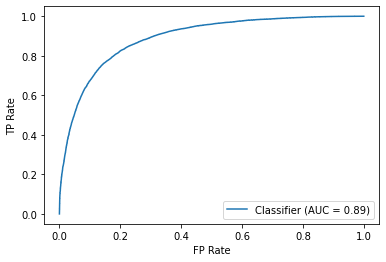

In [54]:
%%time

models['random_forest'] = make_classifier_pipeline(
    RandomForestClassifier(random_state=seed, max_depth=16, n_estimators=950)
)

roc_stratified_kfold(model=models['random_forest'],
                     X=df[x_cols],
                     y=df[y_col])
                     

# XGBoost Classifier 

ROC AUC: 0.8959
CPU times: user 3min 3s, sys: 13.7 s, total: 3min 17s
Wall time: 25.3 s


0.8959110634303681

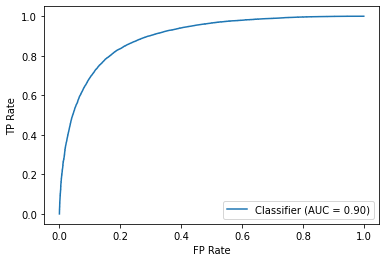

In [55]:
%%time

models['xgb'] = make_classifier_pipeline(
    XGBClassifier(random_state=seed, max_depth=3, n_estimators=850, colsample_bytree=0.8)
)

roc_stratified_kfold(model=models['xgb'],
                     X=df[x_cols],
                     y=df[y_col])

# LightGBM Classifier

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
ROC AUC: 0.8973
CPU times: user 49.8 s, sys: 2.42 s, total: 52.2 s
Wall time: 6.8 s


0.8973137337561902

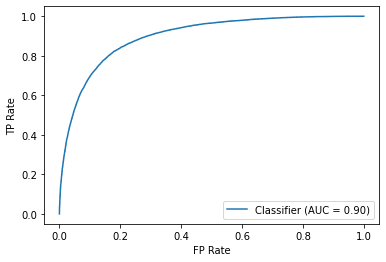

In [56]:
%%time

models['lgbm'] = make_classifier_pipeline(
    LGBMClassifier(random_state=seed, max_depth=5, n_estimators=950, colsample_bytree=0.4)
)

roc_stratified_kfold(model=models['lgbm'],
                     X=df[x_cols],
                     y=df[y_col])
                     

In [59]:
pip install catboost

     |████████████████████████████████| 22.0 MB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 25.5 MB/s  eta 0:00:01
     |████████████████████████████████| 15.2 MB 25.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


# CatBoost Classifier

ROC AUC: 0.8926
CPU times: user 5.7 s, sys: 1.73 s, total: 7.43 s
Wall time: 2.38 s


0.8926196124343431

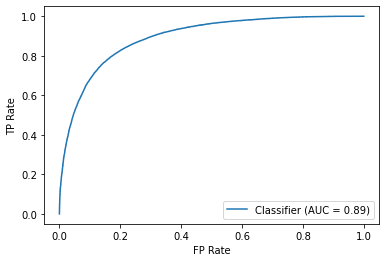

In [61]:
%%time

models['CatBoost'] = make_classifier_pipeline(
    CatBoostClassifier(iterations=150, verbose=0, random_state=2023)
)

roc_stratified_kfold(model=models['CatBoost'],
                     X=df[x_cols],
                     y=df[y_col])



# Ensemble Model

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
ROC AUC: 0.8969


0.8968566056544567

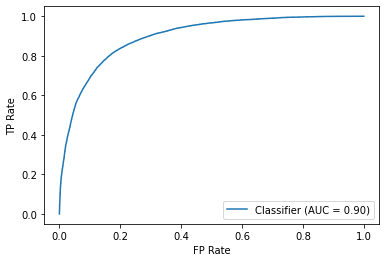

In [63]:
models['ensemble'] = make_classifier_pipeline(
    VotingClassifier([
        ('logistic_regression', models['logistic_regression']['model']),
        ('random_forest', models['random_forest']['model']),
        ('xgb', models['xgb']['model']),
        ('lgbm', models['lgbm']['model']),
        ('CatBoost', models['CatBoost']['model']),
    ], voting='soft')
)

roc_stratified_kfold(model=models['ensemble'],
                     X=df[x_cols],
                     y=df[y_col])
                    

# Predictions

In [66]:

preds = []
model = models['ensemble'].fit(df[x_cols], df[y_col])
pred = model.predict_proba(testdf[x_cols])[:, 1]
preds.append(pred)



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [67]:
ss = pd.read_csv('/Users/aishwaryagabhane/aish_univ/Aishwarya/Masters_courses/BAN_693_Capstone/Kaggle_competition_2/sample_submission.csv')
ss.booking_status = np.mean(np.column_stack(preds), axis=1)
ss

,id,booking_status
0,42100,0.102206
1,42101,0.071105
2,42102,0.283612
3,42103,0.156137
4,42104,0.438943
...,...,...
28063,70163,0.907374
28064,70164,0.112808
28065,70165,0.103721
28066,70166,0.470882


<AxesSubplot:>

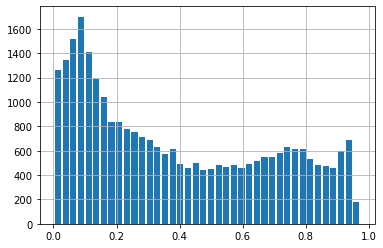

In [68]:
ss.booking_status.hist(bins=40, rwidth=0.8)

In [69]:
ss.to_csv('submissionnew.csv', index=False)